### Aayushi Gupta

## Tathastu Scholar Internship

### Task - EDA on IPL dataset

#### Importing the libraries

Assuming all items are diffrent. Suppose, Delhi is available with names Delhi Capitals and Delhi Daredevils , I am considering both different teams.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
match = pd.read_csv("matches.csv")

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
dell = pd.read_csv('deliveries.csv')

In [5]:
dell.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
match.shape

(756, 18)

In [7]:
dell.shape

(150460, 21)

In [8]:
match.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
dell.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [10]:
match.dtypes

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

### Although season column is in int data types but the data consist of season 2009 to season 2019

In [11]:
a = match.Season.value_counts()

Text(0.5, 0, 'Year')

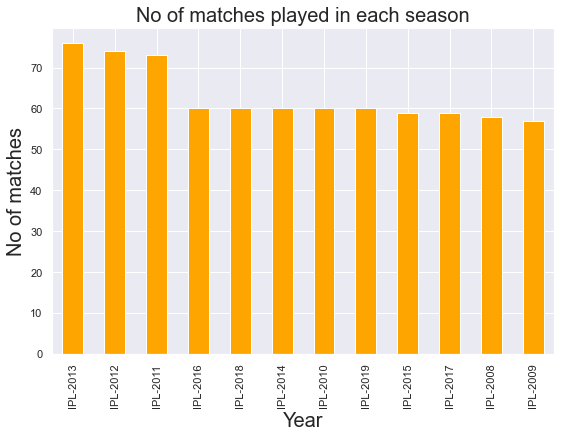

In [12]:
sns.set()
plt.figure(figsize  = (9,6))
a.plot(kind = 'bar', color = 'orange')
plt.title('No of matches played in each season',fontsize = 20)
plt.ylabel('No of matches', fontsize = 20)
plt.xlabel('Year',fontsize = 20)

Text(0.5, 0, 'Year')

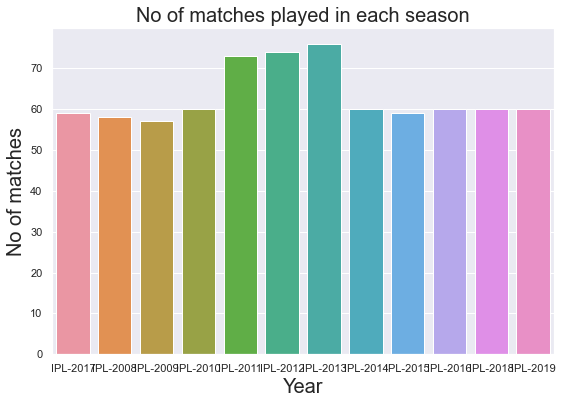

In [13]:
plt.figure(figsize = (9,6))
sns.countplot(x = 'Season', data = match)
plt.title('No of matches played in each season',fontsize = 20)
plt.ylabel('No of matches', fontsize = 20)
plt.xlabel('Year',fontsize = 20)

### In 2012, 2013 , 2014 highest number of matches played because 9 teams were playing

In [14]:
a = match[match['Season'].isin([2012,2014,2013,2012,2016,2019])]

In [15]:
a[a['Season'] == 2013]['team1'].value_counts().count()

0

In [16]:
a[a['Season'] == 2014]['team1'].value_counts().count()

0

### Which City host number of IPL matches

In [17]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [18]:
match.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Eden Garden hosted the maximum number of matches i.e. Kolkata

In [19]:
match['venue'].value_counts().head()

Eden Gardens                                 77
M Chinnaswamy Stadium                        73
Wankhede Stadium                             73
Feroz Shah Kotla                             67
Rajiv Gandhi International Stadium, Uppal    56
Name: venue, dtype: int64

### It means Mumbai has more than 1 stadium in which IPL matches were played

In [20]:
match['city'].value_counts().head(5)

Mumbai       101
Kolkata       77
Delhi         74
Bangalore     66
Hyderabad     64
Name: city, dtype: int64

In [21]:
match.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [22]:
a = match.groupby("Season")['winner'].value_counts()

In [23]:
pd.DataFrame(a)

winner
Season   winner                             
IPL-2008 Rajasthan Royals                 13
         Kings XI Punjab                  10
         Chennai Super Kings               9
         Delhi Daredevils                  7
         Mumbai Indians                    7
...                                      ...
IPL-2019 Kings XI Punjab                   6
         Kolkata Knight Riders             6
         Sunrisers Hyderabad               6
         Rajasthan Royals                  5
         Royal Challengers Bangalore       5

[100 rows x 1 columns]

### No of times team chose to bat or bowl first

Captain choose max number of times to bowl first

In [24]:
match['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [25]:
match[(match['toss_decision'] == 'field') & (match['win_by_wickets']!=0)].shape[0]

253

### 54% times captain took decision right to bowl first

In [26]:
(253/463)*100

54.64362850971922

In [27]:
match[(match['toss_decision'] == 'bat') & (match['win_by_runs']!=0)].shape[0]

135

### 46% times captain took decision right to bat first

In [28]:
(135/293)*100

46.075085324232084

### Man of the match award

#### Chris Gayle got maximum number times of Man of the match award

In [29]:
match['player_of_match'].value_counts().head()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64

### Which team won maximum number of matches all season

#### Mumbai Indians and Chennai Super Kings are the most consistent performer

Text(0, 0.5, 'No of matches')

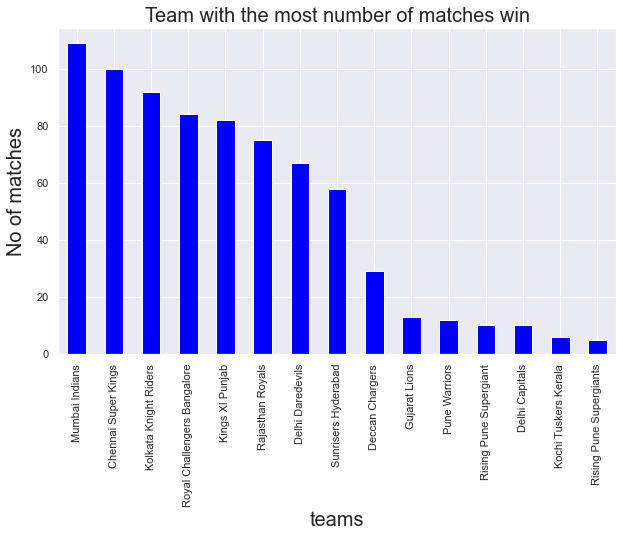

In [30]:
a = match.winner.value_counts()
sns.set()
plt.figure(figsize = (10,6))
a.plot(kind = 'bar',color = 'blue')
plt.title('Team with the most number of matches win',fontsize = 20)
plt.xlabel('teams', fontsize = 20)
plt.ylabel('No of matches',fontsize = 20)

### Most teams preferred to chase

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

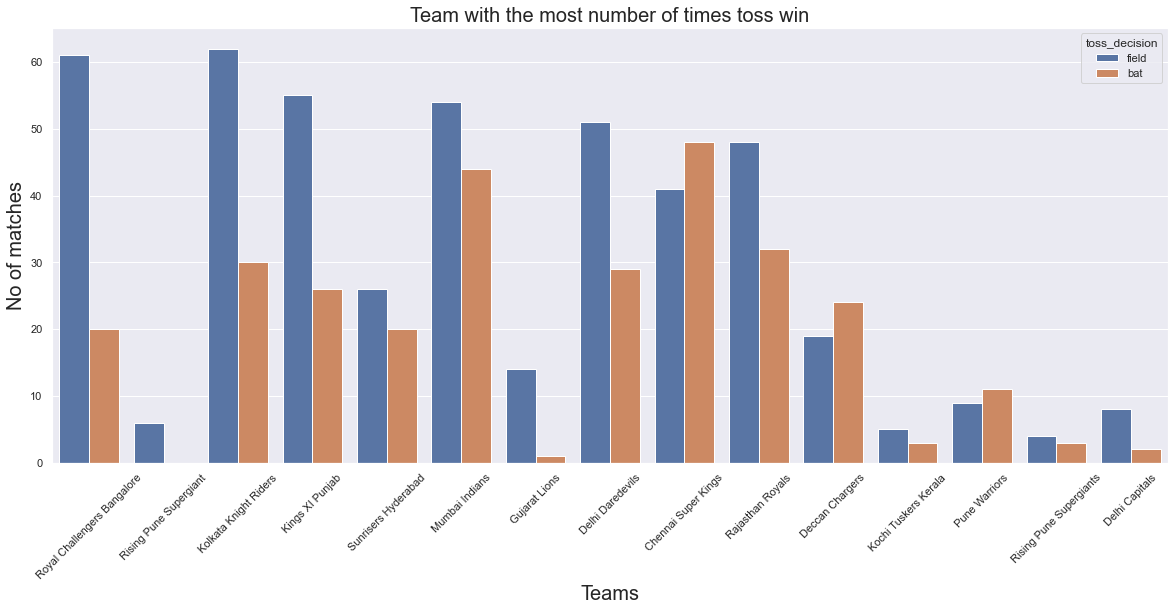

In [31]:
plt.figure(figsize = (20,8))
sns.countplot(x = match['toss_winner'], data = match, hue = 'toss_decision',orient = 'h')
plt.title('Team with the most number of times toss win',fontsize = 20)
plt.ylabel('No of matches', fontsize = 20)
plt.xlabel('Teams',fontsize = 20)
plt.xticks(rotation = 45)

### EDA on Deliveries Data

In [32]:
dell.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [33]:
dell.shape

(150460, 21)

In [34]:
a = dell.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).head(10)

Text(0, 0.5, 'Runs scored')

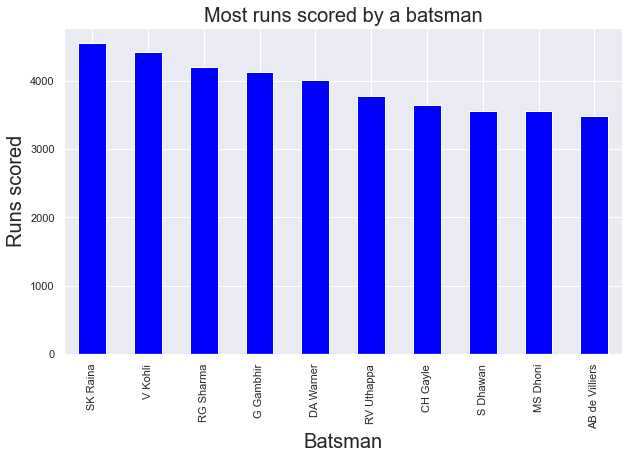

In [35]:
sns.set()
plt.figure(figsize = (10,6))
a.plot(kind = 'bar',color = 'blue')
plt.title('Most runs scored by a batsman',fontsize = 20)
plt.xlabel('Batsman', fontsize = 20)
plt.ylabel('Runs scored',fontsize = 20)

### Mumbai scored most number of runs in the powerplay. Those teams who score less runs played only 2-3 seasons.

In [36]:
b = dell[dell['over'].isin([1,2,3,4,5,6])]
b = b.groupby('batting_team').sum()['total_runs'].sort_values(ascending = False)

Text(0, 0.5, 'Run scored')

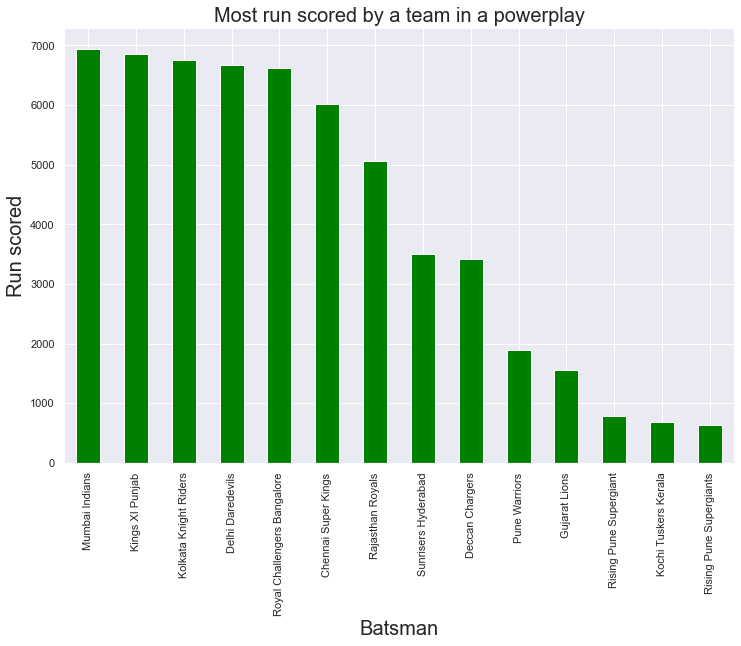

In [37]:
sns.set()
plt.figure(figsize = (12,8))
b.plot(kind = 'bar',color = 'green')
plt.title('Most run scored by a team in a powerplay',fontsize = 20)
plt.xlabel('Batsman', fontsize = 20)
plt.ylabel('Run scored',fontsize = 20)

In [40]:
c = dell[(dell['over'].isin([1,2,3,4,5,6])) & (dell['player_dismissed'].isnull() == False)]
c = c.groupby('batting_team').count()['player_dismissed'].sort_values(ascending = False)

Text(0, 0.5, 'Wickets')

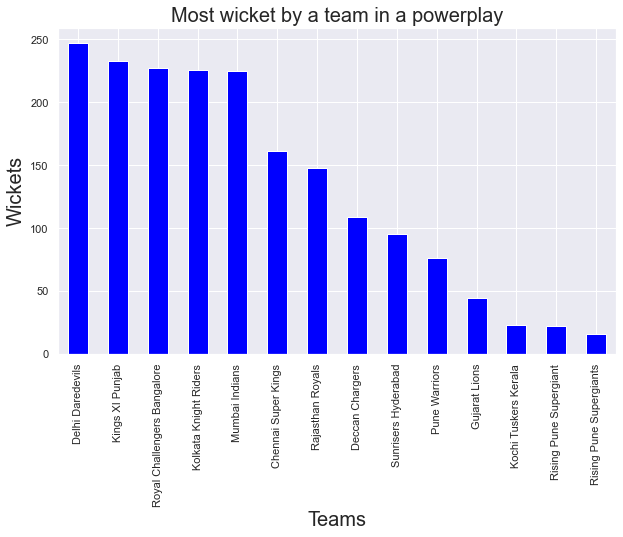

In [41]:
sns.set()
plt.figure(figsize = (10,6))
c.plot(kind = 'bar',color = 'blue')
plt.title('Most wicket by a team in a powerplay',fontsize = 20)
plt.xlabel('Teams', fontsize = 20)
plt.ylabel('Wickets',fontsize = 20)

In [42]:
dell.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [43]:
abc = dell.drop_duplicates(subset = 'match_id')
abc.shape

(636, 21)

In [44]:
abc

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
248,2,1,Mumbai Indians,Rising Pune Supergiant,1,1,PA Patel,JC Buttler,AB Dinda,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
495,3,1,Gujarat Lions,Kolkata Knight Riders,1,1,JJ Roy,BB McCullum,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
713,4,1,Rising Pune Supergiant,Kings XI Punjab,1,1,AM Rahane,MA Agarwal,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
960,5,1,Royal Challengers Bangalore,Delhi Daredevils,1,1,CH Gayle,SR Watson,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149248,632,1,Delhi Daredevils,Royal Challengers Bangalore,1,1,Q de Kock,RR Pant,STR Binny,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149484,633,1,Gujarat Lions,Royal Challengers Bangalore,1,1,AJ Finch,BB McCullum,S Aravind,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
149724,634,1,Sunrisers Hyderabad,Kolkata Knight Riders,1,1,DA Warner,S Dhawan,YK Pathan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149968,635,1,Gujarat Lions,Sunrisers Hyderabad,1,1,ER Dwivedi,BB McCullum,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [46]:
abc1 = abc['batting_team'].value_counts()
abc2 = abc['bowling_team'].value_counts()

In [48]:
abc1 = pd.Series(abc1)
abc2 = pd.Series(abc2)

In [49]:
ab = pd.concat([abc1,abc2],axis = 1)
ab['total'] = ab['batting_team'] + ab['bowling_team']
ab.sort_values(by = 'total', ascending = False).head(10)
ab.drop(['batting_team','bowling_team'],axis = 1,inplace = True)

### Mumbai played the most number of matches

In [50]:
ab.head()

,total
Mumbai Indians,157
Kings XI Punjab,148
Chennai Super Kings,131
Royal Challengers Bangalore,152
Kolkata Knight Riders,148


### Total numbers of matches played in all seasons

In [51]:
dell['match_id'].nunique()

636

### Highest Margin Victory by runs

#### Mumbai India won by highest margin ever in the history of IPL

In [52]:
match[match['win_by_runs'] == match['win_by_runs'].max()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,IPL-2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


### Highest Margin Victory by wickets 

#### So many team won by 10 wickets while chasing the score

In [54]:
match[match['win_by_wickets'] == match['win_by_wickets'].max()]['winner']

2            Kolkata Knight Riders
34                 Kings XI Punjab
71                 Deccan Chargers
119               Delhi Daredevils
183    Royal Challengers Bangalore
298               Rajasthan Royals
376                 Mumbai Indians
390            Chennai Super Kings
542    Royal Challengers Bangalore
590            Sunrisers Hyderabad
683    Royal Challengers Bangalore
Name: winner, dtype: object

### Check any team won by 1 run i.e. (closest Margin Victory)

#### This occurs three times is the history of IPL

In [57]:
match[match['win_by_wickets'] == 1]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
559,560,IPL-2015,Kolkata,09-05-2015,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,1,AD Russell,Eden Gardens,AK Chaudhary,HDPK Dharmasena,NaN
636,7894,IPL-2018,Mumbai,07-04-2018,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
642,7900,IPL-2018,Hyderabad,12-04-2018,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,1,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",O Nandan,Nigel Llong,Vineet Kulkarni


### Check any team won by 1 run i.e. (closest Margin Victory)

#### This also occurs several times

In [58]:
match[match['win_by_runs'] == 1]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
105,106,IPL-2008,Mumbai,21-05-2008,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,1,0,SE Marsh,Wankhede Stadium,BF Bowden,GA Pratapkumar,NaN
163,164,IPL-2009,Johannesburg,17-05-2009,Kings XI Punjab,Deccan Chargers,Deccan Chargers,field,normal,0,Kings XI Punjab,1,0,Yuvraj Singh,New Wanderers Stadium,S Ravi,RB Tiffin,NaN
344,345,IPL-2012,Delhi,29-04-2012,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,1,0,V Sehwag,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
350,351,IPL-2012,Pune,03-05-2012,Mumbai Indians,Pune Warriors,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,SL Malinga,Subrata Roy Sahara Stadium,Asad Rauf,S Asnani,NaN
518,519,IPL-2015,Chennai,09-04-2015,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,1,0,A Nehra,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni,NaN
598,599,IPL-2016,Delhi,27-04-2016,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Gujarat Lions,1,0,CH Morris,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
614,615,IPL-2016,Chandigarh,09-05-2016,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,1,0,SR Watson,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,HDPK Dharmasena,NaN
734,11330,IPL-2019,Bengaluru,21-04-2019,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Royal Challengers Bangalore,1,0,PA Patel,M. Chinnaswamy Stadium,Vineet Kulkarni,Rod Tucker,Anil Chaudhary
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [59]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Tie matches

In [60]:
match['result'].value_counts() ## Total 9 matches are tied

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [61]:
match[match['result'] == 'tie'].shape[0] ### 9 super overs held in the history of IPL

9

In [62]:
a = match[match['result'] == 'tie']

#### Team with the number of matches they won in the  super over

In [63]:
a['winner'].value_counts()

Rajasthan Royals               2
Kings XI Punjab                2
Mumbai Indians                 2
Sunrisers Hyderabad            1
Royal Challengers Bangalore    1
Delhi Capitals                 1
Name: winner, dtype: int64